In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import median_absolute_deviation

### Load the csv dataset and clean it
this part is not usefull anymore, go and loag the cleaned pickle datasetbelow

In [4]:
openfacts_path='Data/en.openfoodfacts.org.products.csv'

In [5]:
df_of=pd.read_csv(openfacts_path,encoding='UTF-8',sep='\t')

C:\Users\Lorenzo\Anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
col_dict={}
for j,i in enumerate(df_of.columns):
    col_dict[j]=i

In [21]:
sum(df_of[col_dict[30]].isna())

830818

In [24]:
df_of_clean=pd.DataFrame()
for j,i in enumerate(df_of.columns):
    if sum(df_of[i].isna())<850000:
        df_of_clean[i]=df_of[i]

In [ ]:
df_of_clean.to_pickle('Data/df_openfacts_small.pkl')

<function matplotlib.pyplot.show(*args, **kw)>

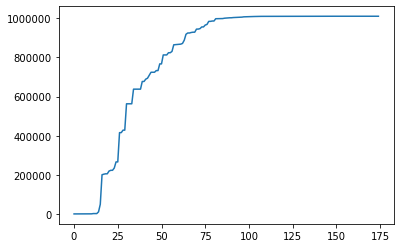

In [23]:
plt.plot(np.sort(nnan))
plt.show

In [40]:
df_sugar=df_tmp[df_tmp['sugars_100g']<100]
df_sugar=df_sugar[df_sugar['sugars_100g']>0]

In [42]:
np.mean(df_sugar['sugars_100g'])

16.05133632880965

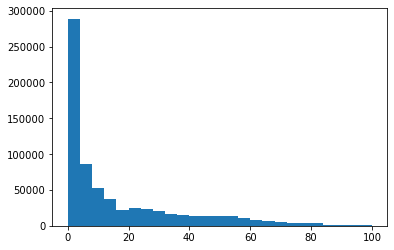

In [48]:
plt.hist(df_sugar['sugars_100g'],bins=25)
plt.show()

In [45]:
df_sugar.shape

(686363, 175)

## LOAD clean dataset

In [2]:
df_of_clean=pd.read_pickle('Data/df_openfacts_small.pkl')

In [3]:
print(df_of_clean.shape)
df_of_clean.head()

(1010608, 57)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,dgesc,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,0.0,0.00,4.8,0.4,NaN,0.2,2.04,0.816,NaN,NaN
4,0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1542456332,2018-11-17T12:05:32Z,1542456333,2018-11-17T12:05:33Z,Mini coco,NaN,NaN,...,3.0,1.00,10.0,3.0,NaN,2.0,1.15,0.460,NaN,NaN


In [4]:
cols_list=df_of_clean.columns
print(cols_list)

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'labels', 'labels_tags',
       'labels_en', 'stores', 'countries', 'countries_tags', 'countries_en',
       'ingredients_text', 'serving_size', 'serving_quantity', 'additives_n',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags',
       'states_en', 'main_category', 'main_category_en', 'image_url',
       'image_small_url', 'image_ingredients_url',
       'image_ingredients_small_url', 'image_nutrition_url',
       'image_nutrition_small_url', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
     

In [5]:
df_ns=df_of_clean[df_of_clean['nutrition-score-fr_100g'].isna()==False].copy()

In [6]:
ng_f=df_ns['nutrition_grade_fr']
print(np.unique(df_ns['nutrition_grade_fr']))

['a' 'b' 'c' 'd' 'e']


In [7]:
def clean_nan(df,var):
    return df[df[var].isna()==False].copy()

In [8]:
def remove_outliers(df,var,k=3):
    '''Uses the MAD critetion to remove outliers, data must be free of nans
    Values that are above or below K times the MAD are removed from the data,
    and a copy of the dataframe is returned'''
    mad=median_absolute_deviation(df[var])
    mean=np.mean(df[var])
    return df[np.logical_and(df[var].values<mean+k*mad,df[var].values>mean-k*mad)].copy()

In [20]:
def dist_nutritiongrade(df,var,bw=0.5,bins=8,):
    df=remove_outliers(clean_nan(df,var),var)
    fig, ax=plt.subplots(figsize=(5,5))
    for ns in np.unique(df['nutrition_grade_fr']):
        sns.distplot(df[df['nutrition_grade_fr']==ns][var],label=ns,ax=ax,kde_kws={"bw": bw},bins=bins)
    plt.legend()
    #return fig

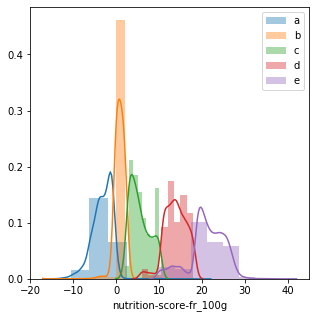

In [21]:
dist_nutritiongrade(df_ns,'nutrition-score-fr_100g',bw=0.7)

In [11]:
facts_100g=['energy_100g', 'fat_100g','saturated-fat_100g',
            'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
            'proteins_100g', 'salt_100g', 'sodium_100g']

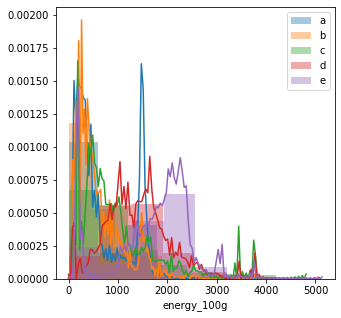

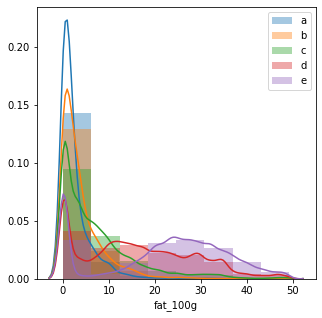

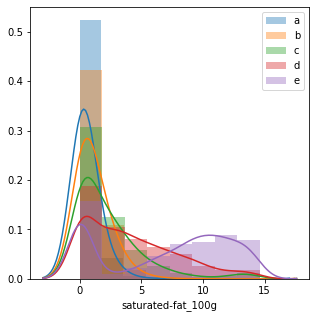

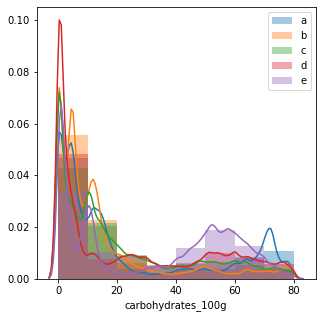

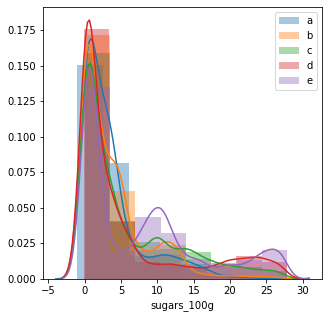

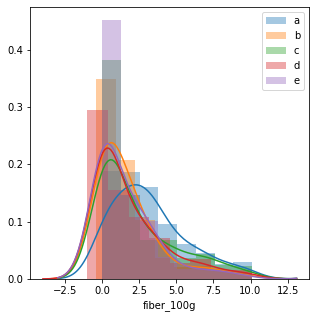

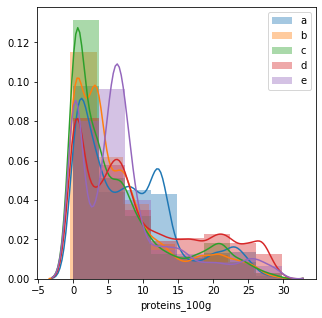

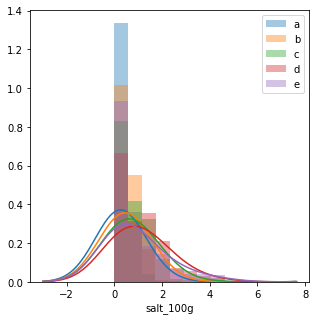

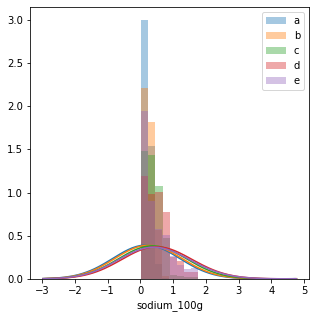

In [22]:
for var in facts_100g:
    dist_nutritiongrade(df_ns,var,bw=1)